In [18]:
# Kaggle Profile: https://www.kaggle.com/ksanand18
# Import packages
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Read training and test data
traindata=pds.read_csv('train.csv')
testdata=pds.read_csv('test.csv')
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


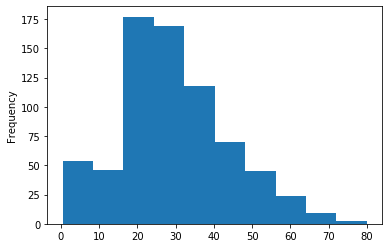

In [14]:
# Plot histogram of ages
ages=traindata.loc[:,'Age']
%matplotlib inline
ages.plot(kind='hist')

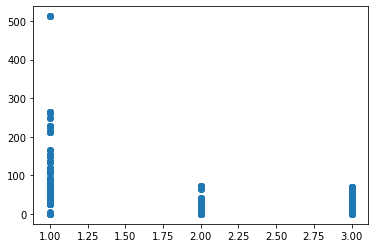

In [20]:
# Graph Fare vs Pclass
fares=traindata.loc[:,['Fare']]
classes=traindata.loc[:,['Pclass']]
%matplotlib inline
plt.scatter(classes,fares)

In [21]:
# Cross tabulate Survive and Pclass
pd.crosstab(traindata.Survived, traindata.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [74]:
# Kaggle submission where First class passengers younger than 10 survive.
# Find survivors according to search criteria
survivors=testdata.loc[(testdata.Pclass==1) & (testdata.Age<10),'PassengerId']
# Create zero array to hold survived
survivedseries= np.zeros(testdata.shape[0])
# Indicate survivors based on index
survivedseries[survivors.index]=1
# Create submission csv
pd.DataFrame({'PassengerId':testdata.PassengerId,'Survived':survivedseries}).set_index('PassengerId').to_csv('KA_Titanic_Submission.csv')